In [1]:
import torch
import pyro
import pyro.distributions as dist
from pyro import poutine
from pyro.infer.reparam import LocScaleReparam
from matplotlib import pyplot as plt

In [2]:
def model(loc=5.0, scale=2.0, num_samples=10000):
    with pyro.plate("samples", num_samples):
        return pyro.sample("x", dist.SoftLaplace(loc, scale))

In [3]:
x = model()
x00 = poutine.reparam(model, {"x": LocScaleReparam(0.0)})()
x01 = poutine.reparam(model, {"x": LocScaleReparam(0.1)})()
x05 = poutine.reparam(model, {"x": LocScaleReparam(0.5)})()
x09 = poutine.reparam(model, {"x": LocScaleReparam(0.9)})()
x10 = poutine.reparam(model, {"x": LocScaleReparam(1.0)})()

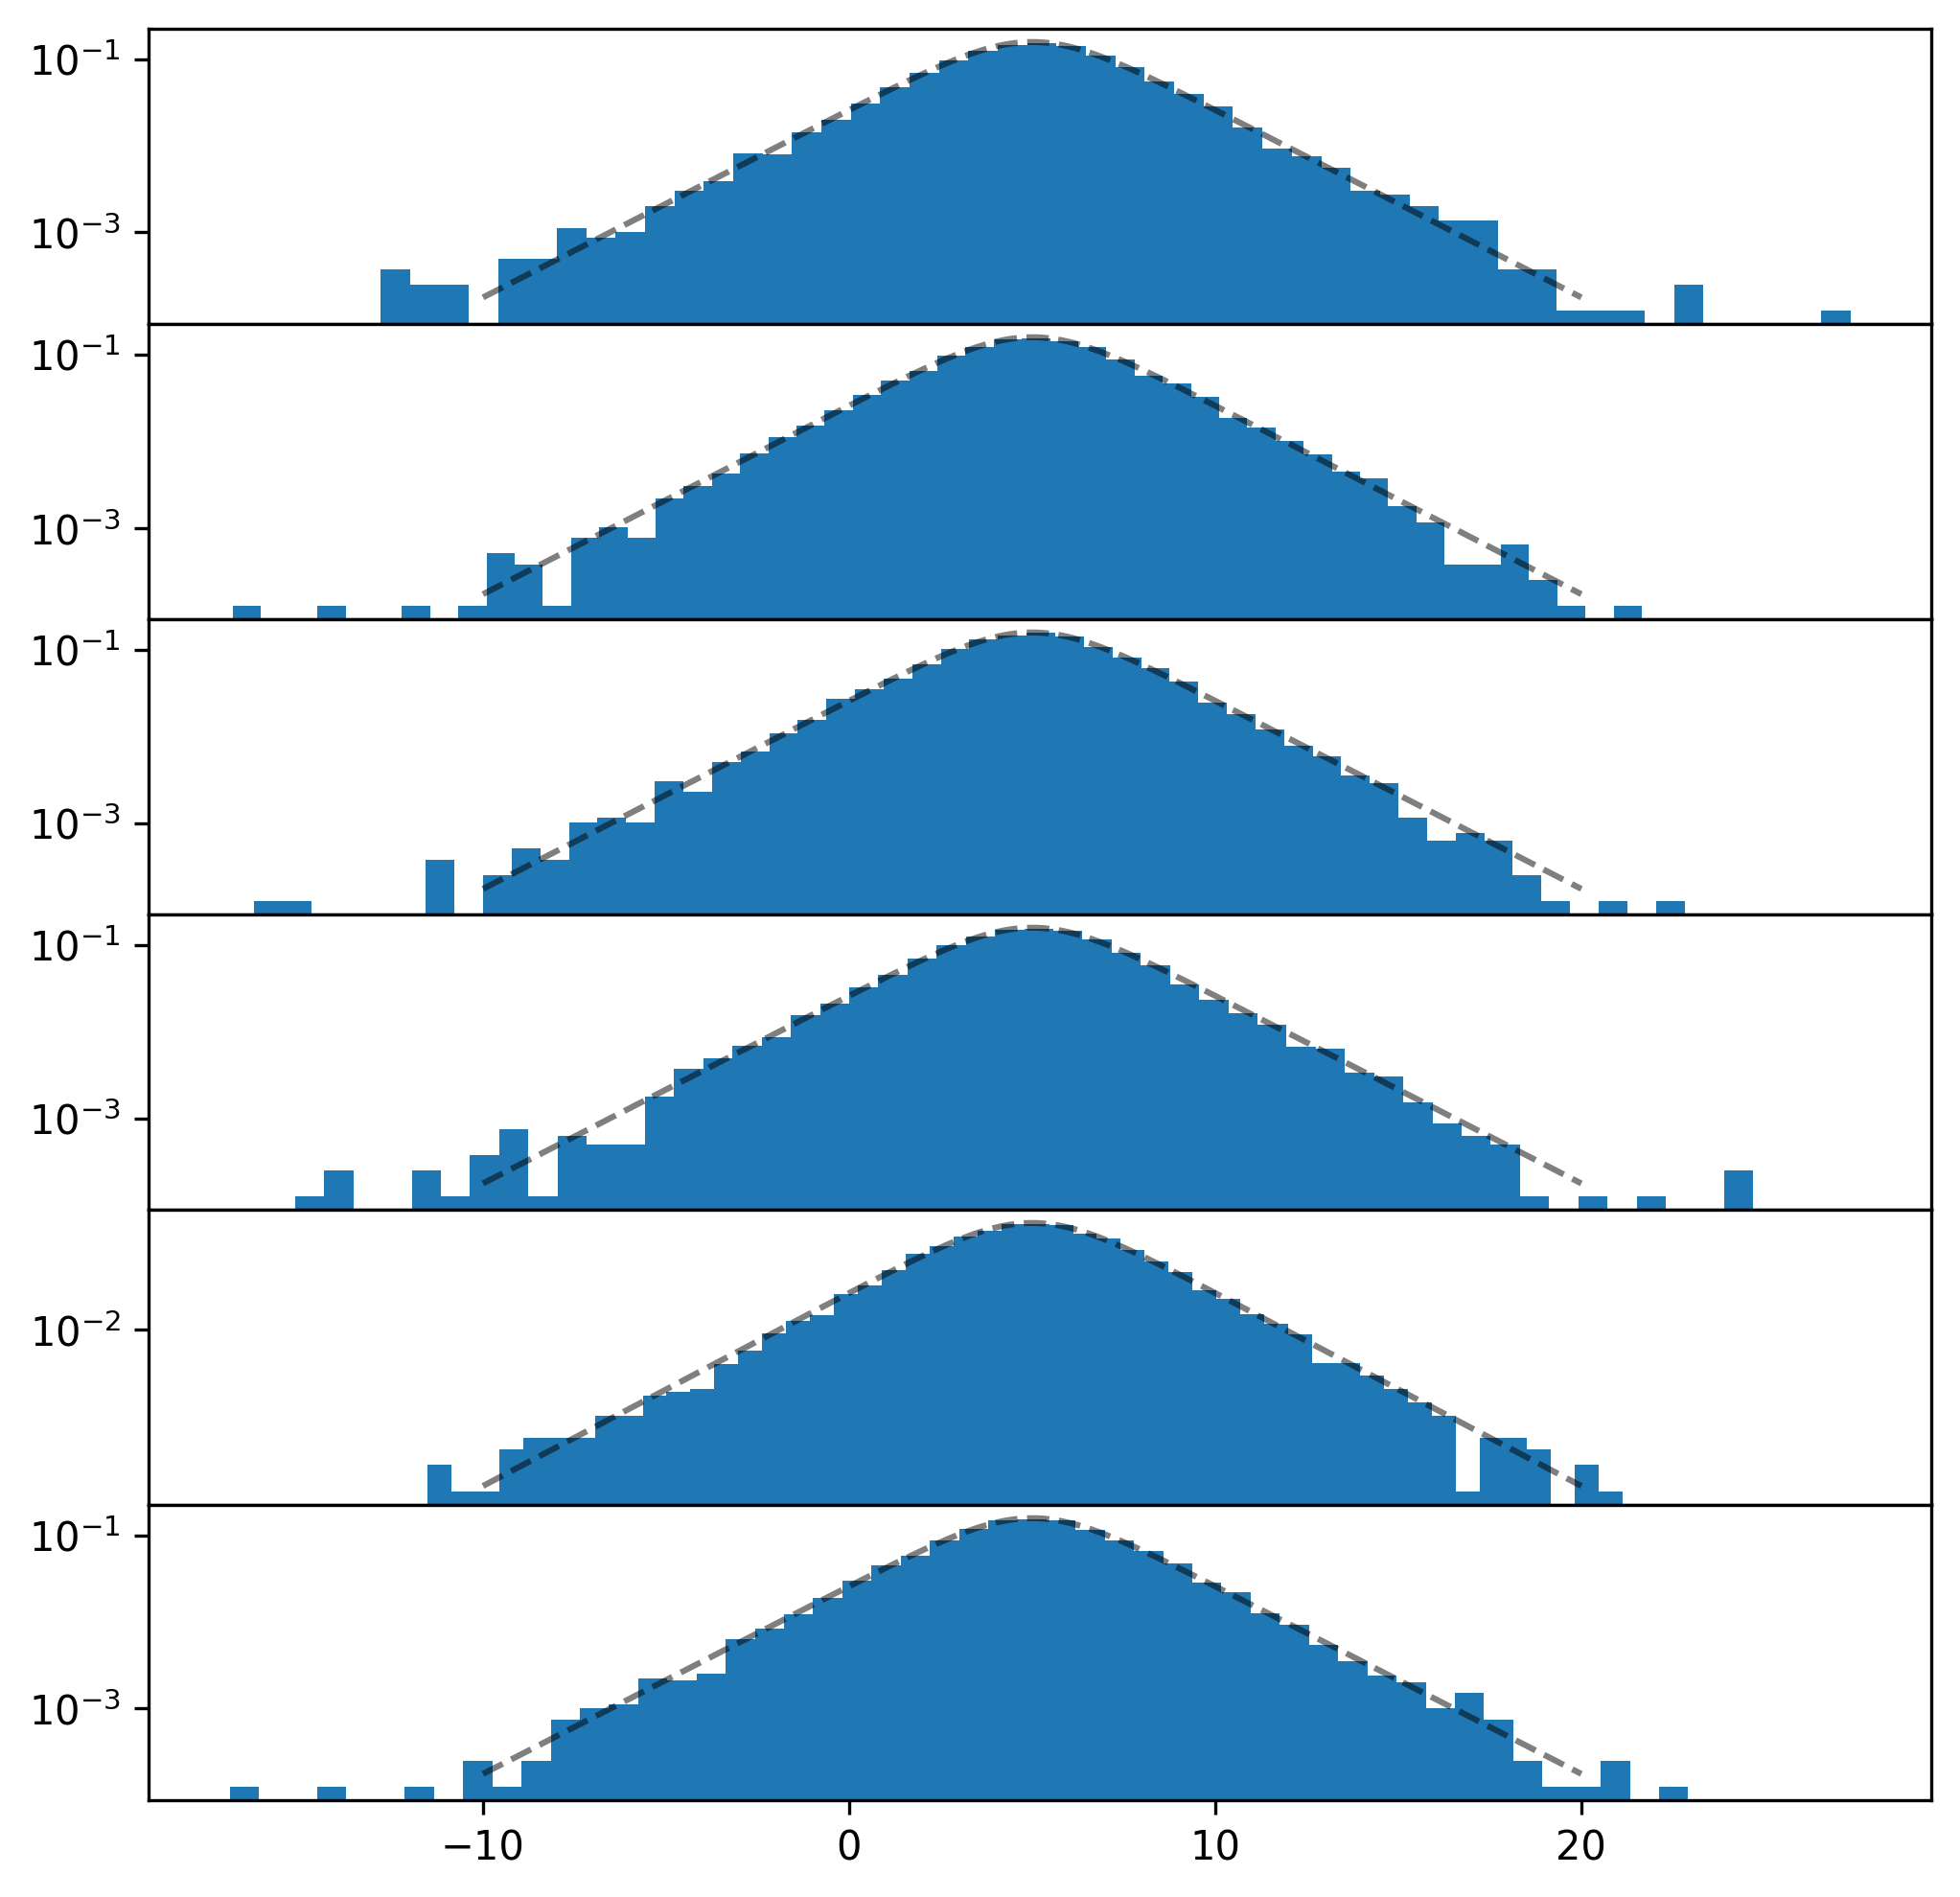

In [9]:
fig, axes = plt.subplots(6, figsize=(8, 8), dpi=300, sharex=True)
u = torch.linspace(-10, 20, 200)
v = dist.SoftLaplace(5, 2).log_prob(u).exp()
for ax, xs in zip(axes, [x, x00, x01, x05, x09, x10]):
    ax.hist(xs.numpy(), bins=50, density=True)
    ax.set_yscale("log")
    ax.plot(u.numpy(), v.numpy(), "k--", alpha=0.5)
plt.subplots_adjust(hspace=0)